In [147]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs

import importlib
importlib.reload(cheer_utils)
print(cheer_utils.__doc__)

#import cheer_utils

from scipy import interpolate as sci
#from scipy.interpolate import RBFInterpolator

# pd.options.mode.copy_on_write = True


    CHEER_UTILS
    utilities for CHEER-STORM
    from repo for codes/processing of STORM datasets for CHEER
    Version 1.5, 23 Apr 2024
    GitHub Repo: git@github.com:BrianOBlanton/CHEER-STORM.git
    Brian Blanton, RENCI



In [142]:
# define dicts for filtering circles for case study areas:
a=np.arange(0,370,10)*np.pi/180
rad=3
lo=-73.5
la=33.75
# test track screening circle
# rad= .3
# lo=-77.75
# la=35
nc_circ={'lo': lo,
         'la': la, 
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}

rad=3
lo=-94
la=29.5
tx_circ={'lo': lo,
         'la':  la,
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}


dlo, dla = 5, 5
ext={ 0: [tx_circ['lo']-dlo, tx_circ['lo']+dlo, tx_circ['la']-dla, tx_circ['la']+dla],
      1: [nc_circ['lo']-dlo, nc_circ['lo']+dlo, nc_circ['la']-dla, nc_circ['la']+dla]}


In [11]:
# define some plotting vars

makeplots=True
writeoutputfiles=False
# marker size
sz=20


## Load IBTRaCS
## converts units to MKS
### Parameters to LoadIBTrACS:

- minyear: delete tracks < minyear
- maxyear: delete tracks > maxyear

In [134]:
df_ib=cheer_utils.LoadIBTrACS(minyear=1980)
#df_ib['RMW_nm']=df_ib['RMW']/1.852   
df_ib

/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/cheer_utils.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df=df2


,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,NATURE,USA_ATCF_ID,SID,USA_STATUS
abssn,,,,,,,,,,,,,,,
485,1980,7,17,0,NA,30.5000,-76.5000,NaN,20.0,NaN,390,TS,AL011980,1980199N31284,TD
485,1980,7,17,3,NA,30.3428,-76.8528,NaN,22.0,NaN,382,TS,AL011980,1980199N31284,TD
485,1980,7,17,6,NA,30.2000,-77.2000,NaN,25.0,NaN,371,TS,AL011980,1980199N31284,TD
485,1980,7,17,9,NA,30.0845,-77.5549,NaN,25.0,NaN,332,TS,AL011980,1980199N31284,TD
485,1980,7,17,12,NA,30.0000,-78.0000,NaN,25.0,NaN,294,TS,AL011980,1980199N31284,TD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2023,11,17,12,NA,17.0364,-79.8000,1004.0,30.0,100.0,200,NR,AL222023,2023319N11282,DB
1194,2023,11,17,15,NA,17.4991,-79.1718,1004.0,30.0,150.0,115,NR,AL222023,2023319N11282,DB
1194,2023,11,17,18,NA,18.0000,-78.5000,1004.0,30.0,200.0,24,NR,AL222023,2023319N11282,DB


In [149]:
# show complete track for storm with largest RMW
# print(df_ib['RMW'].max())
# df_ib.loc[df_ib.RMW.idxmax()]

In [15]:
# further screening of df
#df_ib=df_ib.loc[(df_ib['NATURE']=='TS')]
# & (df['Min_pres'] <= 980)]

## load STORM dataset
## default is to read first 1000 yrs of present climate
### Parameters to LoadSTORMtracks:
- basin='NA' 
- ensnum=0
- climate='current'
- model='present'
- version='_V4'
- nyears=None
- startingyear=None

In [65]:
df_st=cheer_utils.LoadSTORMtracks(nyears=40)

Reading STORM tracks from https://tdsres.apps.renci.org/thredds/fileServer/datalayers/STORM_Bloemendaal_data/present_V4/STORM_DATA_IBTRACS_NA_1000_YEARS_0.txt
Starting year = 231


,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land
abssn,,,,,,,,,,,
2378,231.0,9.0,1.0,0.0,1.0,7.5,-48.7,995.602608,18.108442,74.080002,461.094638
2378,231.0,9.0,1.0,3.0,1.0,7.7,-49.8,991.500000,21.200000,74.080002,409.656180
2378,231.0,9.0,1.0,6.0,1.0,7.9,-50.8,987.500000,24.000000,74.080002,363.372387
2378,231.0,9.0,1.0,9.0,1.0,8.1,-51.8,983.900000,26.400000,74.080002,328.374372
2378,231.0,9.0,1.0,12.0,1.0,8.3,-52.7,984.700000,25.800000,74.080002,308.873994
...,...,...,...,...,...,...,...,...,...,...,...
2817,270.0,9.0,1.0,9.0,1.0,33.3,-78.9,993.900000,22.200000,18.520000,28.527742
2817,270.0,9.0,1.0,12.0,1.0,34.6,-79.7,991.900000,24.000000,18.520000,0.000000
2817,270.0,9.0,1.0,15.0,1.0,36.0,-80.7,991.900000,23.975328,33.953334,0.000000


## Add distance to sites and hb

In [66]:
df_ib['dist2nc']=np.sqrt(np.square(df_ib['Longitude']-nc_circ['lo']) + np.square(df_ib['Latitude']-nc_circ['la']))
df_ib['dist2tx']=np.sqrt(np.square(df_ib['Longitude']-tx_circ['lo']) + np.square(df_ib['Latitude']-tx_circ['la']))
df_ib['HollandB']=cheer_utils.HbFromRmwLat(df_ib['RMW'],df_ib['Latitude'])

df_st['dist2nc']=np.sqrt(np.square(df_st['Longitude']-nc_circ['lo']) + np.square(df_st['Latitude']-nc_circ['la']))
df_st['dist2tx']=np.sqrt(np.square(df_st['Longitude']-tx_circ['lo']) + np.square(df_st['Latitude']-tx_circ['la']))
df_st['HollandB']=cheer_utils.HbFromRmwLat(df_st['RMW'],df_st['Latitude'])

## Apply "spatial" screening for study sites

In [67]:
df_ib_nc=df_ib.loc[(df_ib['dist2nc'] <= nc_circ['rad'])] #  & (df_ib['NATURE']=='TS')]
df_st_nc=df_st.loc[(df_st['dist2nc'] <= nc_circ['rad'])]

## Track location density plots

FileNotFoundError: [Errno 2] No such file or directory: '/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/static/BMNG_hirez.png'

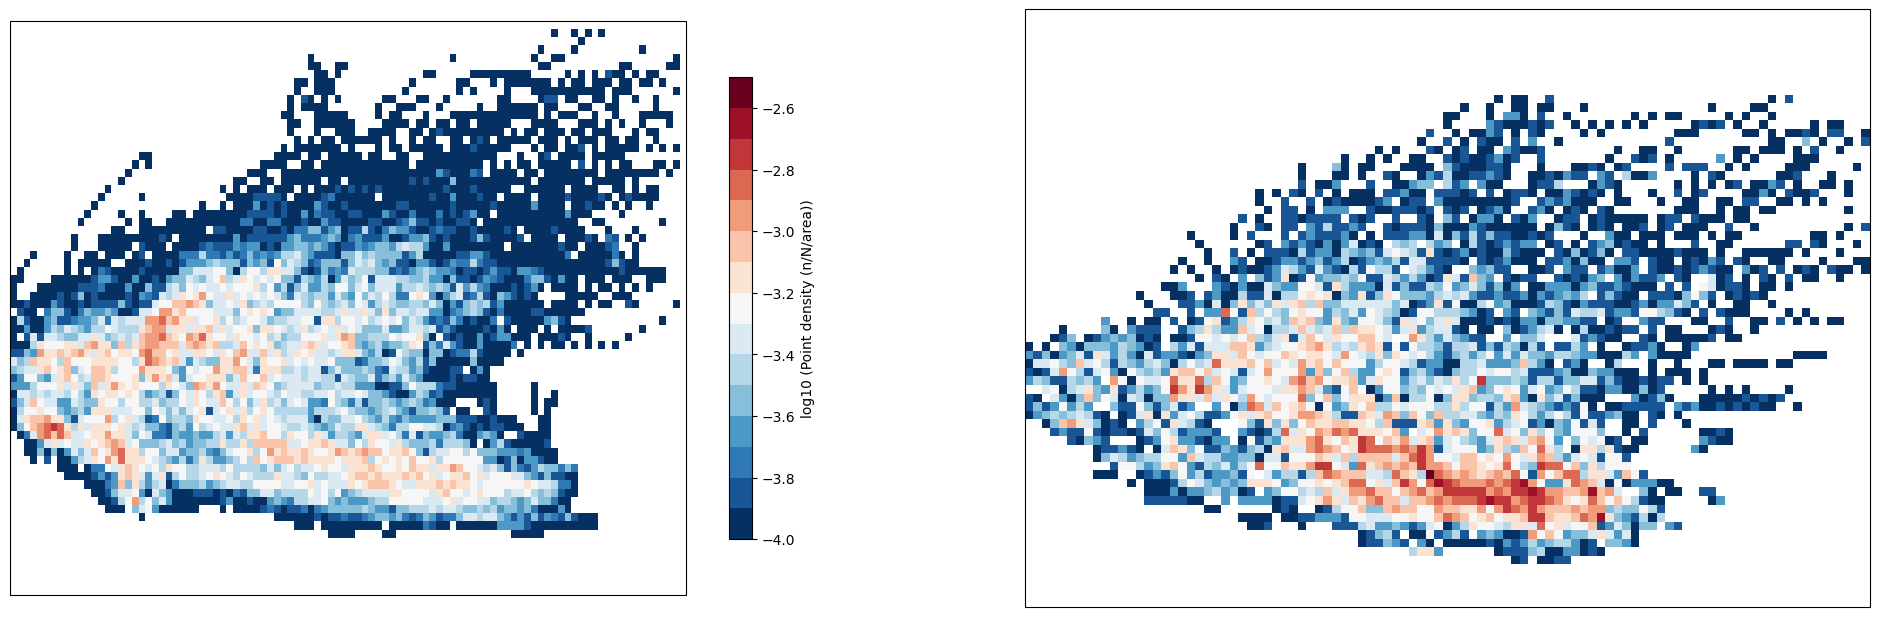

In [186]:
# generate a grid for histogram2d
lo0=-100
lo1=0
la0=0
la1=70
dx,dy=1,1

lon_bins=np.arange(lo0,lo1,dx)
lat_bins=np.arange(la0,la1,dy)

density=True
log10=True
cmapName='RdBu_r'

density_ib,      _,      _ = np.histogram2d(df_ib.Longitude,df_ib.Latitude, bins=(lon_bins,lat_bins), density=density)
density_st, xedges, yedges = np.histogram2d(df_st.Longitude,df_st.Latitude, bins=(lon_bins,lat_bins), density=density)

#import os
#os.environ["CARTOPY_USER_BACKGROUNDS"] = "/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/static"

if makeplots:

    fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(24,10), sharey=True)

    ThisCmap=cheer_utils.discrete_cmap(15, 'jet')

    tstr=[f'IBTRaCS y1={df_ib["Year"].min()}, y2={df_ib["Year"].max()})',
          f'STORM   y1={df_st["Year"].min()}, y2={df_st["Year"].max()}']

    
    if density:
        
        cbstr='Point density (n/N/area)'
        
        tol=1e-5
        tempib=np.where(density_ib.T < tol, np.nan, density_ib.T)
        tempst=np.where(density_st.T < tol, np.nan, density_st.T)
 
        if log10:
            vmin, vmax = -4, -2.5
            nc=15
            tempib=np.log10(tempib)
            tempst=np.log10(tempst)
            cbstr=f'log10 ({cbstr})'
        else:
            vmin, vmax = 1e-3, 1e-8
            nc=10
            
    else:
        
        cbstr='Count'
        nc=10
        
        vmin, vmax = 0, np.power(10,np.ceil(np.log10(density_ib.T.max())))

        tempib=np.where(density_ib.T< 1, np.nan, density_ib.T)
        tempst=np.where(density_st.T< 1, np.nan, density_st.T)
  

    tstr=[f'IBTRaCS \n{df_ib["Year"].min()}-{df_ib["Year"].max()}',
          f'STORM \nnyears={nyears}, {int(df_st["Year"].min())}-{int(df_st["Year"].max())}']
        
    ThisCmap=cheer_utils.discrete_cmap(nc, cmapName)


    axm=[]
    axm.append(ax[0].pcolormesh(lon_bins, lat_bins, tempib, cmap=ThisCmap, vmin=vmin, vmax=vmax)) 
    axm.append(ax[1].pcolormesh(lon_bins, lat_bins, tempst, cmap=ThisCmap, vmin=vmin, vmax=vmax)) 

    # hex grid
    #axm.append(ax[0].hexbin(df_ib.Longitude,df_ib.Latitude, cmap=cmap, bins='log' )) # ,  vmin=vmin, vmax=vmax) 
    #axm.append(ax[1].hexbin(df_st.Longitude,df_st.Latitude, cmap=cmap, bins='log' )) # ,  vmin=vmin, vmax=vmax) 

    for i in range(0,2):
        #ax[i].axis('equal')
        ax[i].set_ylim([la0,la1])
        ax[i].set_xlim([lo0, lo1])
        ax[i].grid(True)
        ax[i].set_aspect(1.0/np.cos(np.mean(lat_bins) * np.pi / 180.0))
        cb=fig.colorbar(axm[i], ax=ax[i], shrink=0.60)
        cb.ax.set_ylabel(cbstr)
        #ax[i].stock_img()
        ax[i].background_img(name='BM', resolution='low')

        ax[i].coastlines()
        ax[i].set_title(tstr[i])
        gl=ax[i].gridlines(draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False


In [ ]:
if makeplots:

    fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(16,7))
    ax=ax.flatten()
    
    ax[0].stock_img()
    ax[0].coastlines()
    ax[1].stock_img()
    ax[1].coastlines()
    
#     ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
#     ax[1].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree())

#     ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
#     ax[1].plot(tx_circ['lo'],tx_circ['la'],marker='*',transform=ccrs.PlateCarree())

    for i in range(0,2):
        ax[i].axis('equal')
        ax[i].set_ylim([10, 50])
        ax[i].set_xlim([-100, -50])
        ax[i].grid(True)

cheer_utils.TrackPlot(df_ib, axx=ax[0], addcolorbar=False)
cheer_utils.TrackPlot(df_st, axx=ax[1], addcolorbar=False)

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))
ax=ax.flatten()

ax[0].stock_img()
ax[0].coastlines()
ax[1].stock_img()
ax[1].coastlines()


ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
ax[1].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())

ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
ax[1].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())

cmap=cheer_utils.discrete_cmap(20, 'jet_r')

for i in range(0,2):
    ax[i].axis('equal')
    ax[i].set_ylim([30, 40])
    ax[i].set_xlim([-82, -70])
    ax[i].grid(True)

df_ib_nc.plot.scatter(x='Longitude',
            y='Latitude',
            c='Min_pres',
            ax=ax[0],vmin=920,vmax=1020,cmap=cmap)
df_st_nc.plot.scatter(x='Longitude',
            y='Latitude',
            c='Min_pres',
            ax=ax[1],vmin=920,vmax=1020,cmap=cmap)

ax[0].set_title('IBTRACS')
ax[1].set_title('STORM')

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,7))

k='RMW'
#xx=((df_ib['Min_pres'])).hist(ax=ax[0], density=True, bins=range(900,1020,10))
axx=((df_ib[k])).hist(ax=ax[0], density=True) #, bins=range(900,1020,10))
#axx.set_ylim([0, .040])
axx.set_xlabel(k)
ax[0].set_title('IBTRACS')

#axx=((df_st['Min_pres'])).hist( ax=ax[1],density=True, bins=range(900,1020,10))
axx=((df_st['RMW'])).hist( ax=ax[1],density=True)# , bins=range(900,1020,10))
#axx.set_ylim([0, .040])
axx.set_xlabel(k)
ax[1].set_title('STORM')

print(df_ib[k].max())
print(df_st[k].max())


In [ ]:
df_ib[df_ib["RMW"] > 35]

In [ ]:

x_i, y_i = np.meshgrid(np.linspace(-100, -60, 80), np.linspace(10, 50, 80))
print(x_i.shape)
xy_i = np.concatenate([x_i.reshape(-1, 1), y_i.reshape(-1, 1)], axis=1)

# grid_x, grid_y = np.meshgrid(np.linspace(-90, -60, 20),
#                              np.linspace(10, 40, 20))
# xy_i = np.concatenate([grid_x, grid_y], axis=1)


In [ ]:
z=np.array(df_ib.Min_pres.values)
x = df_ib.Longitude.values
x = x[np.isfinite(z)] 
y = df_ib.Latitude.values
y = y[np.isfinite(z)] 
values = z[np.isfinite(z)] 

stride=10

x=x[::stride]
y=y[::stride]
values=values[::stride]

points=np.array([x,y]).T


print(x.shape)
print(values.shape)

In [ ]:
rbf = RBFInterpolator(points, values, kernel='gaussian',epsilon=2, smoothing=0.5)
z_i = rbf(xy_i).reshape(x_i.shape).T
z_i.shape

fig, ax = plt.subplots(nrows=1, ncols=1 , figsize=(6,6), dpi=100) # , sharey=True)
ax.set_aspect(1.0/np.cos(np.mean(y) * np.pi / 180.0))

axm=ax.contourf(x_i,y_i,z_i, cmap=cheer_utils.cmap,  vmin=vmin, vmax=vmax) 
#  , levels=levels, norm=norm) #
#axm=ax.scatter(x, y, 50, values, marker='o', cmap=cheer_utils.cmap,  edgecolors='k', vmin=vmin, vmax=vmax) # , norm=norm) #   
#ax.set_title(t)
fig.colorbar(axm, ax=ax, shrink=.85)
ax.plot(cheer_utils.coastline[:,0],cheer_utils.coastline[:,1],color='k',linewidth=1)
ax.set_xlim([-100-12, -40])
ax.set_ylim([5, 55])


In [ ]:
model_rbf = sci.Rbf(x,y,values, smooth=1, degree=1, function='gaussian')

In [ ]:
Z_rbf = model_rbf(x_i, y_i)
vmin=880
vmax=1025
fig, ax = plt.subplots(nrows=1, ncols=1 , figsize=(12,12), dpi=100) # , sharey=True)

axm=ax.contourf(x_i,y_i,Z_rbf, cmap=cheer_utils.cmap,  vmin=vmin, vmax=vmax) 
#  , levels=levels, norm=norm) #
ax.set_aspect(1.0/np.cos(np.mean(y) * np.pi / 180.0))
#axm=ax.scatter(x, y, 50, values, marker='o', cmap=cheer_utils.cmap,  edgecolors='k', vmin=vmin, vmax=vmax) # , norm=norm) #   
#ax.set_title(t)
fig.colorbar(axm, ax=ax, shrink=.85)
ax.plot(cheer_utils.coastline[:,0],cheer_utils.coastline[:,1],color='k',linewidth=1)
ax.set_xlim([-100-12, -40])
ax.set_ylim([5, 55])

print(np.min(values),np.max(values))
print(np.min(Z_rbf),np.max(Z_rbf))
print(Z_rbf.shape)

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))

ax.stock_img()
ax.coastlines()

plt.pcolor(grid_x,grid_y,z_i, )

ax.axis('equal')
ax.set_ylim([10, 50])
ax.set_xlim([-100, -50])
ax.grid(True)

In [ ]:
rng = np.random.default_rng()
points = rng.random((1000, 2))

In [ ]:
rng = np.random.default_rng()
xy = rng.random((100, 2))*4.0-2.0
z = xy[:, 0]*np.exp(-xy[:, 0]**2-xy[:, 1]**2)
edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
x_i, y_i = np.meshgrid(centers, centers)
x_i = x_i.reshape(-1, 1)
y_i = y_i.reshape(-1, 1)
xy_i = np.concatenate([x_i, y_i], axis=1)
rbf = RBFInterpolator(xy, z, epsilon=2)

In [ ]:
ib_yc=[]
st_yc=[]
for y in np.unique(df_ib.Year):
    i = df_ib.loc[(df_ib['Year'] == y)] 
    ib_yc.append(np.unique(i.index).shape[0])
for y in np.unique(df_st.Year):
    i = df_st.loc[(df_st['Year'] == y)] 
    st_yc.append(np.unique(i.index).shape[0])

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,7),sharex=True, sharey=True)

ax[0].hist(ib_yc, density=True)
ax[1].hist(st_yc, density=True)

ax[0].grid(True)
ax[1].grid(True)